#Classification: Logistic Regression
Linear Regression works with numeric continuous data and therefore it is not suitable for predicting qualitative or categorical outcomes. 
To predict binary categorical outcomes, we use a particular classification technique called Logistic Regression. Since Logistic Regression predict binary outcomes, such as Pass/Fail, True/False, Yes/No, we use a Logistic Response Function.


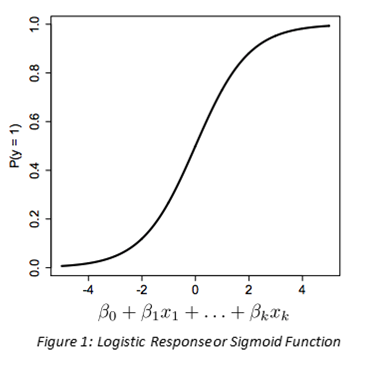

The probabilities on the Logistic Response Function range from 0 to 1. We need to set the threshold or range values for which either 0 or 1 is predicted. For example, we can set this threshold to be 0.4 and thus for probabilities from 0 to 0.39 the value of 0 will be predicted and for probabilities from 0.4 to 1 the value of 1 will be predicted. 

P(0) and P(1) can be used to represent two different outcomes. As such:

$$P(0)=1-P(1)$$

$$P(y=1)=  \frac {1}{1+ e^{-(β_0+ β_1 x_1+ β_2 x_2+⋯+ β_k x_k )}}$$

$$Odds = e^{-(β_0+ β_1 x_1+ β_2 x_2+⋯+ β_k x_k )}$$

$$Logit = ln(Odds) = β_0+ β_1 x_1+ β_2 x_2+⋯+ β_k x_k $$

As can be seen, the formula for the Logit is similar to that for Linear Regression. 


A confusion matrix can be used to assess the performance of a Logistic Regression model. 

<table>
   <tr>
      <th></th>
      <th>Prediction = 0 </th>
      <th>Prediction = 1 </th>
   </tr>
<tr>
  <td>Actual  = 0 </td>
  <td>True Negative </td>
  <td>False Positive </td>
</tr>
<tr>
  <td>Actual  = 1 </td>
  <td>False Negative </td>
  <td>True Positive </td>
</tr>
</table>

$$Sensitivity=  \frac{True Positive}{True Positive+False Negative}$$
Sensitivity analysis shows the percentage of positive cases that are correctly identified. 
$$Specificity=  \frac{True Negative}{True Negative+False Positive}$$

Specificity analysis shows the percentage of negative cases that are correctly identified. 
Setting the model threshold high will result in lower sensitivity and higher specificity. Setting the model threshold low will result in higher sensitivity and lower specificity. 


#Implementing the Logisitc Regression Classifier in Python

In [34]:
import pandas as pd #imports the pandas library
import numpy as np  #imports the numpy library


In [38]:
data = pd.read_csv("HP.csv") #reads the HP dataset in Python environment
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

Regression only works with numerical values. 

In [37]:
data = data.drop(["airport", "waterbody", "bus_ter", "n_hos_beds"], axis = 1) #deletes the three columns that contain string values and one column that contains missing values
data.head(2)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hot_rooms,rainfall,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,11.1920,23,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,12.1728,42,0.046146,1


In [25]:
X = data.iloc[: , : -1].values #selects all rows for all columns except the last column or selects all rows for the independent variables but not the dependent variable
y = data.iloc[:, -1].values    #select all rows for the last column which is the dependent variable

print(X)

[[2.4000000e+01 3.2310000e+01 5.3800000e-01 ... 1.1192000e+01
  2.3000000e+01 4.9347306e-02]
 [2.1600000e+01 3.7070000e+01 4.6900000e-01 ... 1.2172800e+01
  4.2000000e+01 4.6145633e-02]
 [3.4700000e+01 3.7070000e+01 4.6900000e-01 ... 1.0112000e+02
  3.8000000e+01 4.5763966e-02]
 ...
 [2.3900000e+01 4.1930000e+01 5.7300000e-01 ... 1.2191200e+01
  3.1000000e+01 5.7572286e-02]
 [2.2000000e+01 4.1930000e+01 5.7300000e-01 ... 1.5176000e+01
  4.7000000e+01 6.0694299e-02]
 [1.9000000e+01 4.1930000e+01 5.7300000e-01 ... 1.0152000e+01
  4.5000000e+01 6.0335899e-02]]


The output of the above is in a matrix format. 

In [26]:
print(y)

[0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 

The out of the above is in a vector format.

Prior to building a Logistic Regression model, data is split into training and test sets. The model is then built on the training set and tested on the test set. 

In [28]:
from sklearn.model_selection import train_test_split   #to split our data into training and test sets, we need to import the test_train_split class from model_selection module of the sklearn library
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) #splits the data by allocating 20% of the data in the test set and 80% in the training set


One way to ensure that the model performs well is to scale the features or columns of data the make up the independent variables. 

In [39]:
#Scaling the features to improve model performance 
from sklearn.preprocessing import StandardScaler #imports the StandardScaler class
s = StandardScaler() #creates an object of the StandardScaler class
xTrain = s.fit_transform(X_train)
xTest = s.transform(X_test)


The Logistic Regression model can now be built.

In [30]:
from sklearn.linear_model import LogisticRegression   #imports the LogisticRegression class from the linear_module of the sklearn library
model = LogisticRegression()   #creates an object of the LogisticRegression class and names is model
model.fit(X_train, y_train)   #uses the created object to fit a Logisitc Regression model on the training data


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:

y_pred = model.predict(X_test)   #makes prediction on the out of sample data
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))   #outputs the actual values against the predicted values for easy visual inspection

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score   #imports the confusion matrix and accuracy_score
confusion_matrix(y_test, y_pred)   #outputs the confusion matrix

array([[39, 19],
       [12, 32]])

The value of 39 in the top left hand corner of the above matrix shows the number of times that our model correctly predicts 0 when the actual values are 0. The value of 32 in the bottom right hand corner of the above matrix shows the number of times our model correctly predicts 1 when the actual values are 1. 

We can calculate the accuracy of our model as follow.

In [41]:
(39+32)/(39+32+19+12)

0.696078431372549

The above score shows that our model correctly predicts the binary values in about 70% of the times. Another way of performing the same calculation is shown below.

In [33]:
accuracy_score(y_test, y_pred)   #prints the accuracy score

0.696078431372549